# MNIST DATABASE
· train-images-idx3-ubyte.gz  traing set
· train-lables-idx1-ubyte.gz  traing set lables
· t10k-images-idx3-ubyte.gz   test set
· t10k-lables-idx1-ubyte.gz   test set lables

In [2]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [6]:
# print the vector representation of picture [0]
print(x_train[0].reshape(-1))


[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [7]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [10]:
import os
from PIL import Image
import numpy as np

In [11]:
#save the first twenty pictures

#build the dir
save_dir = 'MNIST_data/raw'
if os.path.exists(save_dir) is False:
    os.makedirs(save_dir)
    

for i in range(20):
    image_array = x_train[i]
    
    img = Image.fromarray(np.uint8(image_array)) #change the shape of the pictures into 28*28
    filename = os.path.join(save_dir, f'mnist_train_{i}.jpg')
    img.save(filename)

In [15]:
print(y_train[0])

5


## Use Tensorflow to recognize MNIST (by Softmax)



In [21]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

·Preprocess the Data

In [22]:

# Flatten images from 28x28 -> 784, and normalize pixel values to [0, 1]
x_train = x_train.reshape(-1, 784).astype("float32") / 255.0
x_test = x_test.reshape(-1, 784).astype("float32") / 255.0

# One-hot encode the labels (e.g., 7 => [0 0 0 0 0 0 0 1 0 0])
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

·Build the Softmax Regression Model

In [28]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(784,)),        # Input layer
    tf.keras.layers.Dense(10, activation='softmax')  # Output layer: softmax
])


·Compile the Model

In [24]:
model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


·Train the Model

In [25]:
model.fit(x_train, y_train, batch_size=32, epochs=10, validation_split=0.1)


Epoch 1/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.8225 - accuracy: 0.8035 - val_loss: 0.4504 - val_accuracy: 0.8950
Epoch 2/10
1688/1688 [==============================] - 2s 956us/step - loss: 0.4753 - accuracy: 0.8776 - val_loss: 0.3650 - val_accuracy: 0.9085
Epoch 3/10
1688/1688 [==============================] - 2s 933us/step - loss: 0.4186 - accuracy: 0.8881 - val_loss: 0.3317 - val_accuracy: 0.9147
Epoch 4/10
1688/1688 [==============================] - 2s 935us/step - loss: 0.3903 - accuracy: 0.8941 - val_loss: 0.3130 - val_accuracy: 0.9173
Epoch 5/10
1688/1688 [==============================] - 2s 945us/step - loss: 0.3724 - accuracy: 0.8979 - val_loss: 0.3015 - val_accuracy: 0.9200
Epoch 6/10
1688/1688 [==============================] - 2s 939us/step - loss: 0.3598 - accuracy: 0.9006 - val_loss: 0.2925 - val_accuracy: 0.9232
Epoch 7/10
1688/1688 [==============================] - 2s 954us/step - loss: 0.3502 - accuracy: 0.9027 - val_loss: 0.2863 - v

·Evaluate on Test Set

In [26]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\nTest Accuracy: {test_acc:.4f}")


313/313 [==============================] - 0s 796us/step - loss: 0.3108 - accuracy: 0.9147

Test Accuracy: 0.9147


·Make Predictions

In [27]:
import numpy as np

predictions = model.predict(x_test[:5])
for i in range(5):
    print(f"Prediction: {np.argmax(predictions[i])}, True Label: {np.argmax(y_test[i])}")


1/1 [==============================] - 0s 51ms/step
Prediction: 7, True Label: 7
Prediction: 2, True Label: 2
Prediction: 1, True Label: 1
Prediction: 0, True Label: 0
Prediction: 4, True Label: 4


## (by CNN)

In [29]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical


·Preprocess Data

In [30]:
# Load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape to add channel dimension: (28, 28) → (28, 28, 1)
x_train = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


·Build the CNN Model

In [31]:
model = models.Sequential([
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


Breakdown of each layer:

Conv2D(32, (3,3)): 32 filters of size 3×3 → feature detection. To automatically learn local features like edges, corners, or textures from the image.

MaxPooling2D: Downsamples the feature maps (2×2).Reduces computation and memory usage.

Another Conv2D and pooling → deeper features

Flatten: Converts 2D feature maps into a 1D vector

Dense(64): Fully connected hidden layer

Dense(10, softmax): Outputs probabilities over 10 classes

·Compile the Model

In [32]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

·Train the Model

In [33]:
model.fit(x_train, y_train, batch_size=64, epochs=5, validation_split=0.1)


Epoch 1/5
844/844 [==============================] - 7s 8ms/step - loss: 0.1995 - accuracy: 0.9415 - val_loss: 0.0667 - val_accuracy: 0.9815
Epoch 2/5
844/844 [==============================] - 6s 7ms/step - loss: 0.0599 - accuracy: 0.9820 - val_loss: 0.0497 - val_accuracy: 0.9852
Epoch 3/5
844/844 [==============================] - 6s 7ms/step - loss: 0.0422 - accuracy: 0.9867 - val_loss: 0.0416 - val_accuracy: 0.9878
Epoch 4/5
844/844 [==============================] - 6s 7ms/step - loss: 0.0332 - accuracy: 0.9897 - val_loss: 0.0468 - val_accuracy: 0.9873
Epoch 5/5
844/844 [==============================] - 6s 7ms/step - loss: 0.0266 - accuracy: 0.9915 - val_loss: 0.0350 - val_accuracy: 0.9913


·Evaluate on the Test Set

In [34]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\nTest Accuracy: {test_acc:.4f}")


313/313 [==============================] - 1s 2ms/step - loss: 0.0263 - accuracy: 0.9915

Test Accuracy: 0.9915


·Visualize Predictions

1/1 [==============================] - 0s 47ms/step


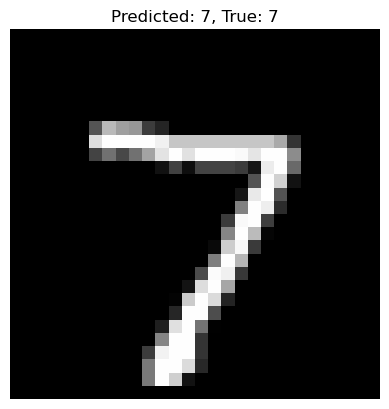

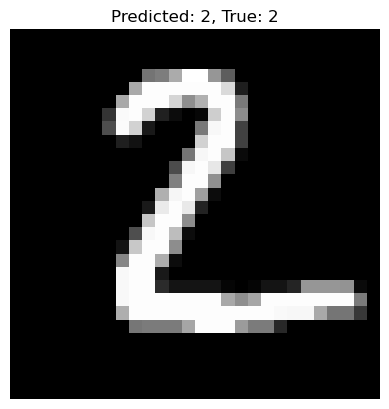

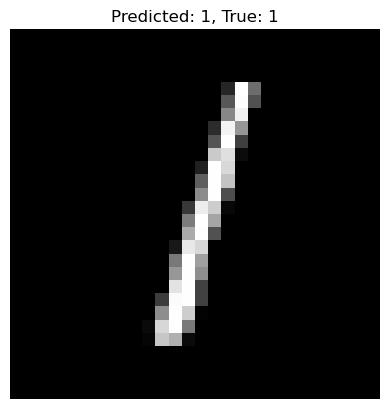

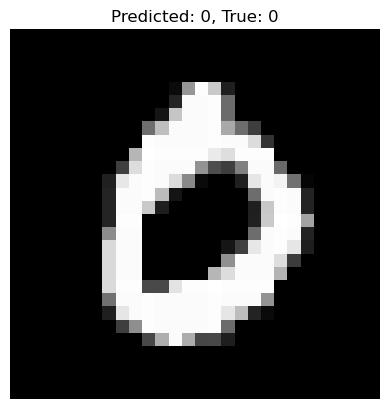

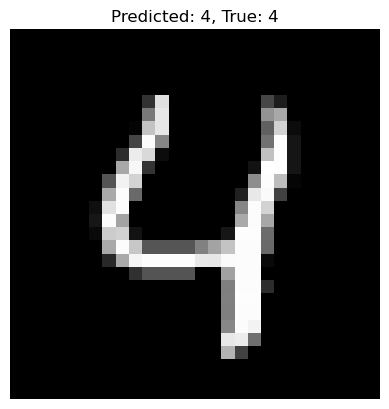

In [35]:
import matplotlib.pyplot as plt
import numpy as np

predictions = model.predict(x_test[:5])

for i in range(5):
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {np.argmax(predictions[i])}, True: {np.argmax(y_test[i])}")
    plt.axis('off')
    plt.show()
